## 군집

### k means

In [1]:
import numpy as np
from sklearn.datasets import make_blobs
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

In [2]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

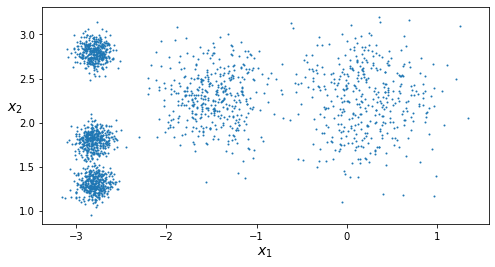

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))
plot_clusters(X)
# save_fig("blobs_plot")
plt.show()

In [19]:
from sklearn.cluster import KMeans
k = 5
kmeans = KMeans(n_clusters = k)
y_pred = kmeans.fit_predict(X)

In [20]:
y_pred

array([0, 4, 1, ..., 3, 1, 4], dtype=int32)

In [21]:
y_pred is kmeans.labels_

True

In [22]:
kmeans.cluster_centers_

array([[-2.80037642,  1.30082566],
       [ 0.20667809,  2.25769931],
       [-1.47077903,  2.28400646],
       [-2.7943747 ,  2.79740645],
       [-2.80389616,  1.80117999]])

In [23]:
X_new = np.array([[0,2],[3,2],[-3,3],[-3,2.5]])
kmeans.predict(X_new)

array([1, 1, 3, 3], dtype=int32)

In [24]:
# 각 샘플과 샌트로이드의 거리를 반환하는 transform

kmeans.transform(X_new)

array([[2.88633901, 0.33034038, 1.49794881, 2.90592274, 2.81093633],
       [5.84236351, 2.80518382, 4.47979071, 5.84898582, 5.80730058],
       [1.71086031, 3.29147303, 1.68853887, 0.28866228, 1.21475352],
       [1.21567622, 3.21581933, 1.54439955, 0.3615693 , 0.72581411]])

### 센트로이드 초기화

In [10]:
# 지정하기
good_init = np.array([[-3,3],[-3,2],[-3,1],[-1,2],[0,2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1) # init에 원하는 포인트를 넣어주고 n_init=1 (초기화 횟수)로 설정

In [11]:
# 랜덤으로 여러번 시도하여 최적의 솔루션 찾기
# n_init으로 초기화 횟수 지정

In [25]:
kmeans.inertia_ # 각 샘플과 샌트로이드의 거리 제곱

211.61107233423053

In [26]:
kmeans.score(X)

-211.61107233423058

### 미니 배치 kmeans

In [27]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5)

In [28]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X) for k in range(1,10)]
inertias = [model.inertia_ for model in kmeans_per_k]

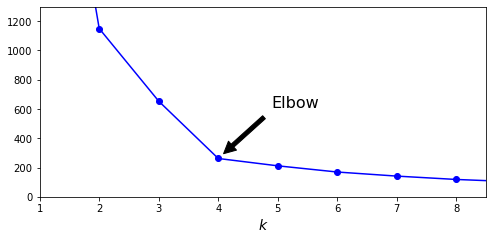

In [29]:
%matplotlib inline
plt.figure(figsize=(8,3.5))
plt.plot(range(1,10), inertias, 'bo-')
plt.xlabel('$k$', fontsize=14)
plt.annotate('Elbow',xy=(4,inertias[3]),xytext=(0.55,0.55),textcoords='figure fraction',
            fontsize=16, arrowprops=dict(facecolor='black', shrink=0.1))
plt.axis([1,8.5,0,1300])
plt.show()

### 실루엣 점수

In [30]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.655517642572828

In [31]:
silhouettes = [silhouette_score(X, model.labels_) for model in kmeans_per_k[1:]]

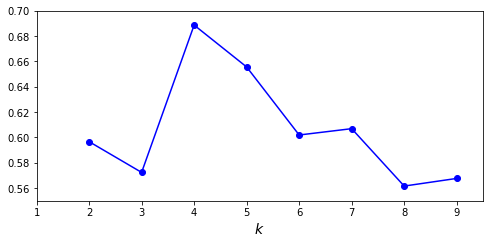

In [32]:
plt.figure(figsize=(8,3.5))
plt.plot(range(2,10), silhouettes, 'bo-')
plt.xlabel('$k$', fontsize=14)
plt.axis([1,9.5,0.55,0.7])
plt.show()

## 이미지 분할

### 색상 분할

In [33]:
from matplotlib.image import imread
import os

image = imread(os.path.join('data','ladybug.png'))
image.shape

(533, 800, 3)

In [34]:
X = image.reshape(-1,3)
kmeans = KMeans(n_clusters=8).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

In [35]:
a = np.array([10,20,100])
b = np.array([1,1,1,1,2,2,0,0])
a[b]

array([ 20,  20,  20,  20, 100, 100,  10,  10])

In [36]:
kmeans.cluster_centers_

[kmeans.labels_]

[array([3, 3, 3, ..., 0, 0, 3], dtype=int32)]

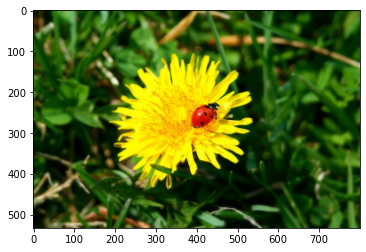

In [37]:
plt.imshow(image)

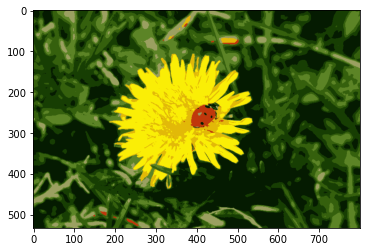

In [38]:
plt.imshow(segmented_img)

## 군집을 이용한 전처리

In [39]:
from sklearn.datasets import load_digits
X_digits, y_digits = load_digits(return_X_y=True)

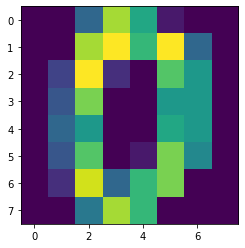

In [40]:
plt.imshow((X_digits[0].astype(int).reshape((8,8,1))))

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_digits, y_digits)

In [42]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train,y_train)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [43]:
log_reg_score = log_reg.score(X_test, y_test)
log_reg_score

0.9777777777777777

In [44]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50)),
    ("log_reg", LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42))
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=50)),
                ('log_reg',
                 LogisticRegression(max_iter=5000, multi_class='ovr',
                                    random_state=42))])

In [45]:
pipeline.score(X_test, y_test)

0.98

In [46]:
from sklearn.model_selection import GridSearchCV

param_grid = dict(kmeans__n_clusters=range(2,100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 98 candidates, totalling 294 fits
[CV] kmeans__n_clusters=2 ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................. kmeans__n_clusters=2, total=   0.3s
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   0.2s
[CV] kmeans__n_clusters=2 ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ............................. kmeans__n_clusters=2, total=   0.2s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.3s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.2s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.3s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=   0.3s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=   0.3s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=   0.3s
[CV] kmeans__n_clusters=5 ............................................
[CV] .

KeyboardInterrupt: 

In [47]:
grid_clf.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [48]:
grid_clf.score(X_test,y_test)

AttributeError: 'GridSearchCV' object has no attribute 'scorer_'

## 군집을 이용한 준지도 학습

In [102]:
n_labeled = 50
log_reg = LogisticRegression(multi_class="ovr", random_state=42, solver='liblinear')
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])
log_reg.score(X_test, y_test)

0.84

In [103]:
k = 50
kmeans = KMeans(n_clusters=k)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

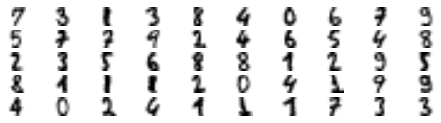

In [104]:
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')
plt.show()

In [109]:
y_representative_digits = np.array([7,3,1,3,8,4,0,6,7,9,5,7,7,9,1,4,6,5,4,8,2,3,5,6,8,8,1,2,9,5,8,1,1,1,2,0,4,1,9,9,4,0,2,4,1,1,1,7,3,3])

In [110]:
log_reg = LogisticRegression(multi_class="ovr", random_state=42, solver='liblinear')
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.8911111111111111

In [111]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

In [112]:
log_reg = LogisticRegression(multi_class="ovr", random_state=42, solver='liblinear')
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

0.9222222222222223

In [113]:
percentile_closest = 20

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [114]:
log_reg = LogisticRegression(multi_class="ovr", random_state=42, solver='liblinear')
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

0.9244444444444444

In [116]:
np.mean(y_train_partially_propagated == y_train[partially_propagated])

0.9759450171821306

## DBSCAN

In [119]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [121]:
len(dbscan.core_sample_indices_)

800

In [122]:
dbscan.core_sample_indices_

array([  0,   1,   2,   3,   5,   6,   7,   8,   9,  10,  11,  12,  14,
        15,  16,  18,  23,  24,  25,  28,  30,  31,  32,  33,  34,  35,
        36,  38,  39,  41,  45,  46,  48,  49,  50,  51,  52,  53,  54,
        56,  57,  58,  59,  61,  62,  63,  65,  66,  67,  68,  69,  70,
        72,  73,  74,  75,  77,  78,  80,  81,  82,  83,  84,  85,  86,
        87,  88,  89,  90,  91,  92,  94,  95,  97,  98,  99, 100, 101,
       103, 104, 105, 106, 108, 109, 110, 111, 112, 113, 115, 117, 118,
       119, 121, 122, 123, 125, 128, 129, 130, 131, 132, 133, 134, 135,
       137, 139, 140, 141, 142, 143, 146, 147, 148, 149, 150, 153, 154,
       155, 156, 157, 159, 162, 163, 164, 165, 166, 167, 169, 170, 172,
       173, 174, 175, 176, 178, 179, 181, 182, 184, 185, 186, 187, 188,
       190, 191, 192, 193, 194, 196, 197, 198, 199, 200, 201, 203, 206,
       207, 209, 210, 212, 213, 214, 215, 216, 217, 218, 220, 221, 222,
       223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 234, 23

In [123]:
dbscan.components_

array([[ 0.43541588,  0.96001502],
       [ 0.03964759,  0.33456059],
       [ 1.88635865, -0.0337901 ],
       ...,
       [ 1.75602179, -0.10156709],
       [ 1.60820379, -0.29669267],
       [ 0.95872122,  0.44022751]])

In [124]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05)
dbscan = DBSCAN(eps=0.20, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.2)

In [125]:
dbscan.labels_

array([0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,

In [126]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [127]:
X_new = np.array([[-0.5,0],[0,0.5],[1,-0.1],[2,1]])
knn.predict(X_new)

array([1, 0, 1, 0])

In [130]:
knn.predict_proba(X_new)

array([[0.16, 0.84],
       [1.  , 0.  ],
       [0.12, 0.88],
       [1.  , 0.  ]])

## 가우시안 혼합

In [131]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [132]:
from sklearn.mixture import GaussianMixture

In [134]:
gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10)

In [135]:
gm.weights_ # 비율

array([0.20961444, 0.39032584, 0.40005972])

In [136]:
gm.means_ # 평균

array([[ 3.39947665,  1.05931088],
       [ 0.05145113,  0.07534576],
       [-1.40764129,  1.42712848]])

In [137]:
gm.covariances_ # 공분산

array([[[ 1.14740131, -0.03271106],
        [-0.03271106,  0.95498333]],

       [[ 0.68825143,  0.79617956],
        [ 0.79617956,  1.21242183]],

       [[ 0.63478217,  0.72970097],
        [ 0.72970097,  1.16094925]]])

In [149]:
gm.converged_ # 수렴여부

True

In [150]:
gm.n_iter_ # 반복횟수

4

In [151]:
gm.predict(X)

array([1, 1, 2, ..., 0, 0, 0])

In [152]:
gm.predict_proba(X) # 확률

array([[2.31833274e-02, 9.76815996e-01, 6.76282339e-07],
       [1.64110061e-02, 9.82914418e-01, 6.74575575e-04],
       [1.99781831e-06, 7.52377580e-05, 9.99922764e-01],
       ...,
       [9.99999568e-01, 4.31902443e-07, 2.12540639e-26],
       [1.00000000e+00, 5.20915318e-16, 1.45002917e-41],
       [1.00000000e+00, 2.30971331e-15, 7.93266114e-41]])

In [154]:
X_new, y_new = gm.sample(6) # 샘플생성가능!!
X_new

array([[ 5.40139574,  2.54602637],
       [ 3.62661784,  2.72627816],
       [ 4.47802214, -0.68841293],
       [ 0.6072719 ,  0.82979375],
       [ 2.09725986,  2.78592474],
       [-1.48169957,  1.50293374]])

In [156]:
gm.score_samples(X)

array([-2.60786904, -3.57094519, -3.3302143 , ..., -3.51359636,
       -4.39793229, -3.80725953])

### 가우시안 혼합을 사용한 이상치 탐지

In [158]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]

In [160]:
len(anomalies)

50

### 클러스터 개수 선택하기

In [161]:
gm.bic(X)

8189.733705221634

In [162]:
gm.aic(X)

8102.508425106596

In [163]:
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(X) for k in range(1,11)]

In [164]:
bics = [model.bic(X) for model in gms_per_k]
aics = [model.aic(X) for model in gms_per_k]

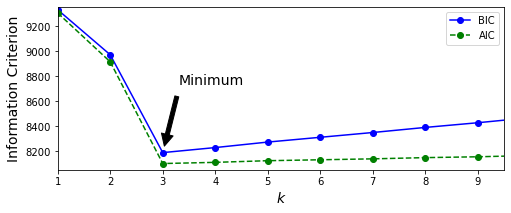

In [165]:
plt.figure(figsize=(8, 3))
plt.plot(range(1, 11), bics, "bo-", label="BIC")
plt.plot(range(1, 11), aics, "go--", label="AIC")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Information Criterion", fontsize=14)
plt.axis([1, 9.5, np.min(aics) - 50, np.max(aics) + 50])
plt.annotate('Minimum',
             xy=(3, bics[2]),
             xytext=(0.35, 0.6),
             textcoords='figure fraction',
             fontsize=14,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.legend()
plt.show()